##Reading Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree


In [2]:

df = pd.read_csv('main_dataset.csv',na_values='=')
df

,Unnamed: 0,tiploc,dst_loc,Train NO.,DAY,min_delay
0,0,WEYMTH,UPWEY,8734176,Sunday,0
1,1,UPWEY,DRCHJN,8734176,Sunday,1
2,2,DRCHJN,DRCHS,8734176,Sunday,0
3,3,DRCHS,MORETON,8734176,Sunday,0
4,4,MORETON,WOOL,8734176,Sunday,0
...,...,...,...,...,...,...
142119,142119,HCRTJN,SURBITN,8717244,Wednesday,0
142120,142120,SURBITN,BRLANDS,8717244,Wednesday,0
142121,142121,BRLANDS,NEWMLDN,8717244,Wednesday,0
142122,142122,NEWMLDN,RAYNSPK,8717244,Wednesday,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142124 entries, 0 to 142123
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  142124 non-null  int64 
 1   tiploc      142124 non-null  object
 2   dst_loc     142124 non-null  object
 3   Train NO.   142124 non-null  int64 
 4   DAY         142123 non-null  object
 5   min_delay   142124 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.5+ MB


In [4]:
df.isnull().sum()  

Unnamed: 0    0
tiploc        0
dst_loc       0
Train NO.     0
DAY           1
min_delay     0
dtype: int64

In [5]:
df.head(6)

,Unnamed: 0,tiploc,dst_loc,Train NO.,DAY,min_delay
0,0,WEYMTH,UPWEY,8734176,Sunday,0
1,1,UPWEY,DRCHJN,8734176,Sunday,1
2,2,DRCHJN,DRCHS,8734176,Sunday,0
3,3,DRCHS,MORETON,8734176,Sunday,0
4,4,MORETON,WOOL,8734176,Sunday,0
5,5,WOOL,WARHAM,8734176,Sunday,0


In [6]:
df.columns

Index(['Unnamed: 0', 'tiploc', 'dst_loc', 'Train NO.', 'DAY', 'min_delay'], dtype='object')

In [7]:
data2=df.copy()

In [8]:
dist=(data2['tiploc'])
distset=set(dist)
dd=list(distset)
dictOfWords1 = { dd[i] : i  for i in range(0, len(dd) ) }
data2['tiploc']=data2['tiploc'].map(dictOfWords1)
dictOfWords1


{'GLHM': 0,
 'ADLESTN': 1,
 'TWCKNMJ': 2,
 'YOVILPM': 3,
 'EPUTNEY': 4,
 'FRNBRCE': 5,
 'NETLEY': 6,
 'RWLNDSC': 7,
 'BDHMPTN': 8,
 'RAYNSPK': 9,
 'WOKING': 10,
 'TOTTON': 11,
 'SWNWICK': 12,
 'BYFLANH': 13,
 'OXSHOTT': 14,
 'BRKWOOD': 15,
 'THFORD': 16,
 'ANDOVER': 17,
 'HMBLE': 18,
 'WONT': 19,
 'MDNNWTN': 20,
 'FELTHMJ': 21,
 'NSHEEN': 22,
 'EGHAM': 23,
 'POINTPJ': 24,
 'SHERBRN': 25,
 'CBHMSDA': 26,
 'LISS': 27,
 'DRCHJN': 28,
 'COSHAM': 29,
 'WBYFLET': 30,
 'LYNDHRD': 31,
 'MRTLKE': 32,
 'ADLESTJ': 33,
 'SLSBRY': 34,
 'BLIEURD': 35,
 'WALRSAL': 36,
 'FRBRMN': 37,
 'SURBITN': 38,
 'WDNPK': 39,
 'WLNDNJW': 40,
 'HAVANT': 41,
 'WITLEY': 42,
 'SHALFDJ': 43,
 'LIPHOOK': 44,
 'EFNGHMJ': 45,
 'GDLMING': 46,
 'NINELMJ': 47,
 'TISBURY': 48,
 'BRANKSM': 49,
 'SLSBTJN': 50,
 'SHAWFD': 51,
 'STDENYS': 52,
 'BNTFORD': 53,
 'TMPCMB': 54,
 'STMGTS': 55,
 'GRATELY': 56,
 'WILTON': 57,
 'BOMO': 58,
 'CHETNOL': 59,
 'COSHAMJ': 60,
 'FELTHAM': 61,
 'UPWEY': 62,
 'MLFORD': 63,
 'DRCHW': 64,
 'NMILTON

In [9]:
import pickle

with open('dictOfWords1.pickle', 'wb') as handle:
    pickle.dump(dictOfWords1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('dictOfWords1.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (dictOfWords1 == b)

True


In [10]:
dist=(data2['dst_loc'])
distset=set(dist)
dd=list(distset)
dictOfWords2 = { dd[i] : i  for i in range(0, len(dd) ) }
data2['dst_loc']=data2['dst_loc'].map(dictOfWords2)
dictOfWords2

{'GLHM': 0,
 'ADLESTN': 1,
 'TWCKNMJ': 2,
 'YOVILPM': 3,
 'EPUTNEY': 4,
 'FRNBRCE': 5,
 'NETLEY': 6,
 'RWLNDSC': 7,
 'BDHMPTN': 8,
 'RAYNSPK': 9,
 'WOKING': 10,
 'TOTTON': 11,
 'SWNWICK': 12,
 'BYFLANH': 13,
 'OXSHOTT': 14,
 'BRKWOOD': 15,
 'THFORD': 16,
 'ANDOVER': 17,
 'HMBLE': 18,
 'WONT': 19,
 'MDNNWTN': 20,
 'FELTHMJ': 21,
 'NSHEEN': 22,
 'EGHAM': 23,
 'POINTPJ': 24,
 'SHERBRN': 25,
 'CBHMSDA': 26,
 'LISS': 27,
 'DRCHJN': 28,
 'COSHAM': 29,
 'WBYFLET': 30,
 'LYNDHRD': 31,
 'MRTLKE': 32,
 'ADLESTJ': 33,
 'SLSBRY': 34,
 'BLIEURD': 35,
 'WALRSAL': 36,
 'FRBRMN': 37,
 'SURBITN': 38,
 'WDNPK': 39,
 'WLNDNJW': 40,
 'HAVANT': 41,
 'WITLEY': 42,
 'SHALFDJ': 43,
 'LIPHOOK': 44,
 'EFNGHMJ': 45,
 'GDLMING': 46,
 'NINELMJ': 47,
 'TISBURY': 48,
 'BRANKSM': 49,
 'SLSBTJN': 50,
 'SHAWFD': 51,
 'STDENYS': 52,
 'BNTFORD': 53,
 'TMPCMB': 54,
 'STMGTS': 55,
 'GRATELY': 56,
 'WILTON': 57,
 'BOMO': 58,
 'CHETNOL': 59,
 'COSHAMJ': 60,
 'FELTHAM': 61,
 'UPWEY': 62,
 'MLFORD': 63,
 'DRCHW': 64,
 'NMILTON

In [11]:
with open('dictOfWords2.pickle', 'wb') as handle:
    pickle.dump(dictOfWords2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
dist=(data2['Train NO.'])
distset=set(dist)
dd=list(distset)
dictOfWords3 = { dd[i] : i  for i in range(0, len(dd) ) }
data2['Train NO.']=data2['Train NO.'].map(dictOfWords3)
dictOfWords3

{8734208: 0,
 8731649: 1,
 8731648: 2,
 8734211: 3,
 8731651: 4,
 8734212: 5,
 8731654: 6,
 8731652: 7,
 8731655: 8,
 8176634: 9,
 8176642: 10,
 8731659: 11,
 8176644: 12,
 8734201: 13,
 8731662: 14,
 8731663: 15,
 8731664: 16,
 8176648: 17,
 8176650: 18,
 8731667: 19,
 8731668: 20,
 8734227: 21,
 8176638: 22,
 8731671: 23,
 8731672: 24,
 8734231: 25,
 8731674: 26,
 8731675: 27,
 8734232: 28,
 8731677: 29,
 8734237: 30,
 8731679: 31,
 8731678: 32,
 8731681: 33,
 8731680: 34,
 8731683: 35,
 8731684: 36,
 8176640: 37,
 8717312: 38,
 8731687: 39,
 8731688: 40,
 8731689: 41,
 8731691: 42,
 8717315: 43,
 8734257: 44,
 8734258: 45,
 8731700: 46,
 8731701: 47,
 8717316: 48,
 8734265: 49,
 8734269: 50,
 8176646: 51,
 8734272: 52,
 8737345: 53,
 8737346: 54,
 8717318: 55,
 8717321: 56,
 8734289: 57,
 8734290: 58,
 8717322: 59,
 8717222: 60,
 8176652: 61,
 8717325: 62,
 8176654: 63,
 7903855: 64,
 8176656: 65,
 8176657: 66,
 8176658: 67,
 8717333: 68,
 8717334: 69,
 8717335: 70,
 8717336: 71,
 7

In [13]:
with open('dictOfWords3.pickle', 'wb') as handle:
    pickle.dump(dictOfWords3, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
dist=(data2['DAY'])
distset=set(dist)
dd=list(distset)
dictOfWords4 = { dd[i] : i  for i in range(0, len(dd) ) }
data2['DAY']=data2['DAY'].map(dictOfWords4)
dictOfWords4

{nan: 0,
 'Wednesday': 1,
 'Thursday': 2,
 'Tuesday': 3,
 'Monday': 4,
 'Saturday': 5,
 'Friday': 6,
 'Sunday': 7}

In [15]:
with open('dictOfWords4.pickle', 'wb') as handle:
    pickle.dump(dictOfWords4, handle, protocol=pickle.HIGHEST_PROTOCOL)

## 

In [16]:
data2

,Unnamed: 0,tiploc,dst_loc,Train NO.,DAY,min_delay
0,0,97,62,197,7,0
1,1,62,28,197,7,1
2,2,28,71,197,7,0
3,3,71,139,197,7,0
4,4,139,99,197,7,0
...,...,...,...,...,...,...
142119,142119,73,38,168,1,0
142120,142120,38,82,168,1,0
142121,142121,82,112,168,1,0
142122,142122,112,9,168,1,0


<AxesSubplot:>

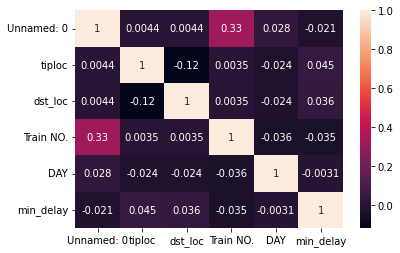

In [17]:
sns.heatmap(data2.corr(),annot=True)

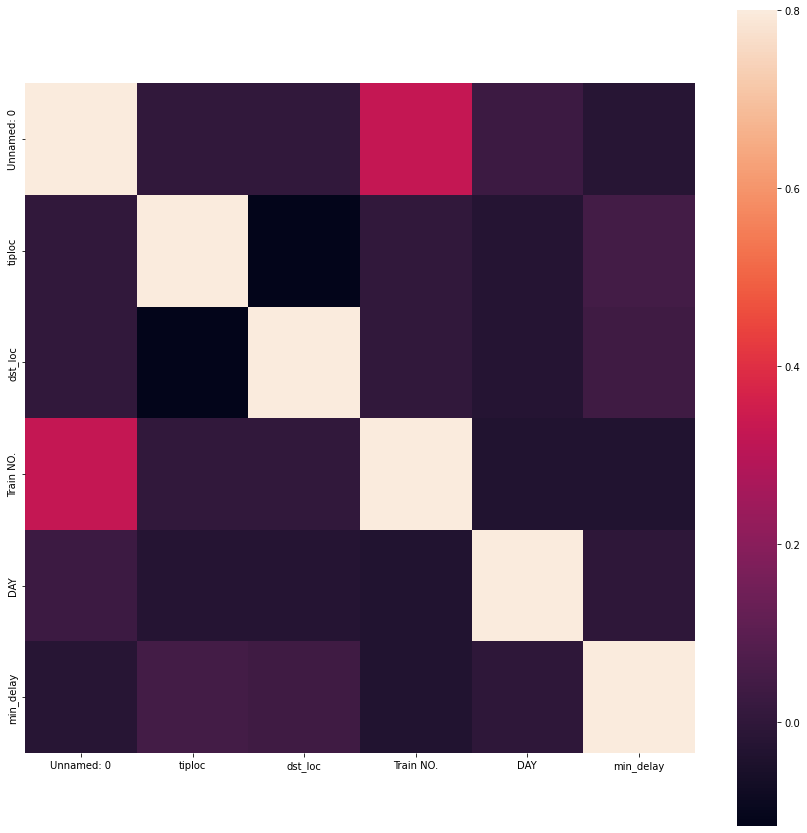

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = data2.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [19]:
data2.head(10)

,Unnamed: 0,tiploc,dst_loc,Train NO.,DAY,min_delay
0,0,97,62,197,7,0
1,1,62,28,197,7,1
2,2,28,71,197,7,0
3,3,71,139,197,7,0
4,4,139,99,197,7,0
5,5,99,75,197,7,0
6,6,75,76,197,7,0
7,7,76,122,197,7,0
8,8,122,107,197,7,1
9,9,107,132,197,7,1


In [20]:
data2.isnull().sum()

Unnamed: 0    0
tiploc        0
dst_loc       0
Train NO.     0
DAY           0
min_delay     0
dtype: int64

In [21]:
data2.describe()

,Unnamed: 0,tiploc,dst_loc,Train NO.,DAY,min_delay
count,142124.000000,142124.000000,142124.000000,142124.000000,142124.000000,142124.000000
mean,71061.500000,80.580796,80.580796,109.131737,3.790838,0.217880
std,41027.809166,38.862893,38.862893,78.594666,1.909286,0.626924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35530.750000,51.000000,51.000000,33.000000,2.000000,0.000000
50%,71061.500000,79.000000,79.000000,101.000000,4.000000,0.000000
75%,106592.250000,114.000000,114.000000,188.000000,5.000000,0.000000
max,142123.000000,142.000000,142.000000,222.000000,7.000000,4.000000


In [22]:
data2.columns

Index(['Unnamed: 0', 'tiploc', 'dst_loc', 'Train NO.', 'DAY', 'min_delay'], dtype='object')

In [23]:
data2=data2.drop(['Unnamed: 0'], axis=1)

In [24]:
data2.columns

Index(['tiploc', 'dst_loc', 'Train NO.', 'DAY', 'min_delay'], dtype='object')

In [25]:
features = data2[['tiploc', 'dst_loc', 'Train NO.', 'DAY']]
target = data2['min_delay']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = data2['min_delay']

In [26]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [27]:
acc=[]
model=[]

In [28]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(Xtrain,Ytrain)
   b_pred = regr.predict(Xtest)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, Ytest))
   print('MAE =', mae(b_pred, Ytest))
   print('R2 Score =', r2_score(b_pred, Ytest))

MSE = 0.3827113277452189
MAE = 0.3555347779930118
R2 Score = -26.35502183813447


In [29]:
b_pred

array([0.23578737, 0.23578737, 0.23578737, ..., 0.23578737, 0.0876754 ,
       0.23578737])

In [24]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  86.19876868953385


C:\Users\Admin\Anaconda3\envs\leaf_disease\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     24219
           1       0.55      0.25      0.34      2931
           2       0.00      0.00      0.00       660
           3       0.00      0.00      0.00       381
           4       0.00      0.00      0.00       234

    accuracy                           0.86     28425
   macro avg       0.29      0.25      0.25     28425
weighted avg       0.80      0.86      0.82     28425



In [25]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.86687775, 0.86627968, 0.86540018, 0.86698329, 0.85396144])

In [26]:
#guassian naive bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.8520316622691293
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     24219
           1       0.00      0.00      0.00      2931
           2       0.00      0.00      0.00       660
           3       0.00      0.00      0.00       381
           4       0.00      0.00      0.00       234

    accuracy                           0.85     28425
   macro avg       0.17      0.20      0.18     28425
weighted avg       0.73      0.85      0.78     28425



C:\Users\Admin\Anaconda3\envs\leaf_disease\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.85551451, 0.85551451, 0.85551451, 0.85547933, 0.85550943])

In [29]:
#SVM

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

In [70]:
#Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

In [ ]:
#random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8498856640281442
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     24219
           1       0.46      0.47      0.46      2931
           2       0.12      0.05      0.07       660
           3       0.07      0.02      0.04       381
           4       0.04      0.02      0.02       234

    accuracy                           0.85     28425
   macro avg       0.32      0.30      0.30     28425
weighted avg       0.83      0.85      0.84     28425



In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.86174142, 0.85467018, 0.85854002, 0.85804749, 0.8323248 ])

In [32]:
#xgboosty

In [33]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

C:\Users\Admin\Anaconda3\envs\leaf_disease\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.8699032541776605
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     24219
           1       0.56      0.42      0.48      2931
           2       0.07      0.00      0.00       660
           3       0.00      0.00      0.00       381
           4       0.00      0.00      0.00       234

    accuracy                           0.87     28425
   macro avg       0.31      0.28      0.28     28425
weighted avg       0.82      0.87      0.84     28425



In [78]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[13:12:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.78136364, 0.79227273, 0.59409091, 0.43772727, 0.43747158])

In [30]:
import pickle

In [31]:
pickle.dump(regr, open('model.pkl', 'wb'))

In [32]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(Xtest[1:2])

array([0.23578737])

In [84]:
Xtest[100:101]
#pickled_model.predict(Xtest[100:101])

,tiploc,dst_loc,Train NO.,DAY
64303,27,25,6,4


In [105]:
#predicting delay on user data

In [122]:
#12	88	197	5
Xtest[:1]['tiploc']=1
Xtest[:1]['dst_loc']=1
Xtest[:1]['Train NO.']=112
Xtest[:1]['DAY']=5

C:\Users\Admin\Anaconda3\envs\leaf_disease\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\envs\leaf_disease\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\envs\leaf_disease\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [128]:
Xtest[:7]

,tiploc,dst_loc,Train NO.,DAY
101515,1,1,112,5
58685,32,60,29,2
94512,66,9,205,1
68079,80,61,170,2
12178,39,7,39,3
135285,27,25,181,2
8291,27,25,1,2


In [131]:
pickled_model.predict(Xtest[:1])[0]

0

In [132]:
Xtest[:7].to_csv('user_pred.csv')